# Preperation

In [184]:
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#read the path
file_path = "D:\\UNI Materials\\Year 3\\Sem.1\\Data Analysis\\Project1"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['wastebase_scan_summary_202103F.csv',
 'wastebase_scan_summary_202104F.csv',
 'wastebase_scan_summary_202105F.csv',
 'wastebase_scan_summary_202106F.csv',
 'wastebase_scan_summary_202107F.csv',
 'wastebase_scan_summary_202108F.csv',
 'wastebase_scan_summary_202109F.csv',
 'wastebase_scan_summary_202110F.csv',
 'wastebase_scan_summary_202111F.csv',
 'wastebase_scan_summary_202112F.csv',
 'wastebase_scan_summary_202201F.csv',
 'wastebase_scan_summary_202202F.csv',
 'wastebase_scan_summary_202203F.csv',
 'wastebase_scan_summary_202204F.csv',
 'wastebase_scan_summary_202205F.csv',
 'wastebase_scan_summary_202206F.csv',
 'wastebase_scan_summary_202207F.csv',
 'wastebase_scan_summary_202208F.csv']

In [185]:
#Merge all files into one df
df = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)

# Preprocessing

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066213 entries, 0 to 1066212
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_barcode       17775 non-null  float64
 1   product_label         17775 non-null  object 
 2   product_size          17775 non-null  object 
 3   brand_name            17775 non-null  object 
 4   manufacturer_country  17760 non-null  object 
 5   manufacturer_name     17775 non-null  object 
 6   scan_country          17775 non-null  object 
 7   data_url              17775 non-null  object 
 8   bottle_weight         963 non-null    float64
 9   bottle_count          17775 non-null  float64
 10  Date                  17775 non-null  object 
dtypes: float64(3), object(8)
memory usage: 89.5+ MB


In [187]:
#Get the columns count with null values
df.isna().sum()

product_barcode         1048438
product_label           1048438
product_size            1048438
brand_name              1048438
manufacturer_country    1048453
manufacturer_name       1048438
scan_country            1048438
data_url                1048438
bottle_weight           1065250
bottle_count            1048438
Date                    1048438
dtype: int64

In [188]:
# Drop records that contain null values in all the columns
df=df.dropna(how='all')

In [189]:
# Dimentionality Reduction
df.drop(columns=['data_url', 'bottle_weight'],inplace=True)

In [190]:
df.reset_index()

,index,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,bottle_count,Date
0,0,6.106960e+11,Vimto Gasificado,350 ml,Vimto,GB,Nichols plc,MZ,1.0,Mar-21
1,1,8.179390e+11,Anti-Bac All Purpose Cleaner,828ml,Method,US,Method Products pbc,GB,1.0,Mar-21
2,2,2.089620e+12,Agua Mineral,5.0 L,Água de Namaacha,MZ,Sociedade de Águas de Moçambique,MZ,1.0,Mar-21
3,3,4.082243e+07,Bonaqua Mineral Water,500 ml,Bonaqua,US,Coca-Cola,MZ,9.0,Mar-21
4,4,4.238066e+07,Fanta Litchi,280 ml,Fanta,US,Coca-Cola,MZ,6.0,Mar-21
...,...,...,...,...,...,...,...,...,...,...
17770,1066208,9.556140e+12,Drinking Water,1.5 L,Summer,UK,UNKNOWN_ORG,MZ,1.0,Aug-22
17771,1066209,9.556400e+12,Lemon Lime Drink,515 ml,Gatorade,US,"Pepsico, Inc",MZ,1.0,Aug-22
17772,1066210,9.716190e+12,Agua Purificada,1.5 L,Nevada,MZ,"Nevada General Supplies Co, Lda",MZ,48.0,Aug-22
17773,1066211,9.716190e+12,Agua Purificada,5.0 L,Nevada,MZ,"Nevada General Supplies Co, Lda",MZ,83.0,Aug-22


In [191]:
# Get the columnn with null values
df.isna().sum()

product_barcode          0
product_label            0
product_size             0
brand_name               0
manufacturer_country    15
manufacturer_name        0
scan_country             0
bottle_count             0
Date                     0
dtype: int64

In [192]:
# Know which country has the most value counts in he dataset
df['manufacturer_country'].value_counts()

US    4149
UK    2354
TZ    1954
MZ    1870
KE    1534
GB    1498
ZA    1015
ZM     743
FR     385
PT     296
JP     237
RW     219
NL     197
MW     173
ES     147
DE     115
BE     104
CH      95
CA      78
SG      73
TR      66
LT      59
IN      50
UG      37
CI      35
AT      33
AE      28
CN      25
ZW      25
UA      23
MY      22
AO      21
TH      17
AR      17
GH      16
EG      12
MT      11
DK      10
BM       6
BR       5
KM       3
SL       3
Name: manufacturer_country, dtype: int64

In [193]:
# Fill the null values with this country (like filling with mean)
df = df.fillna('US')

In [194]:
#Checking if there's any null values
df.isna().sum()

product_barcode         0
product_label           0
product_size            0
brand_name              0
manufacturer_country    0
manufacturer_name       0
scan_country            0
bottle_count            0
Date                    0
dtype: int64

In [195]:
#Check for the duplicated records
df.duplicated().sum()

16

In [196]:
# Drop these records
df.drop_duplicates(inplace=True)

In [197]:
df.duplicated().sum()

0

In [198]:
df = df.reset_index()

# EDA

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

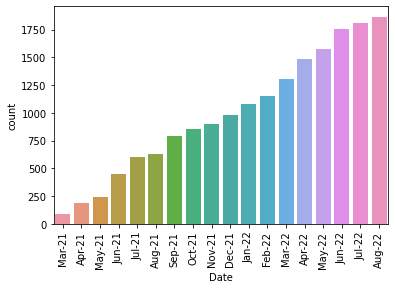

In [200]:
# Return the Series having unique values
x = df['Date'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = df['Date'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('Date')
plt.ylabel('count')
sb.countplot(data=df, x='Date');
# Dsiplay the plot
plt.xticks(rotation=90);
plt.show()

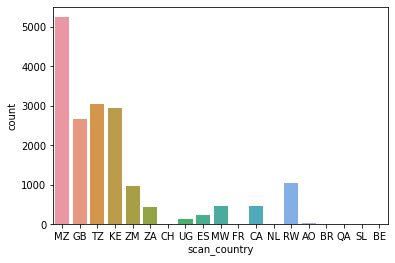

In [201]:
# Return the Series having unique values
x = df['scan_country'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = df['scan_country'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('scan_country')
plt.ylabel('count')
sb.countplot(data=df, x='scan_country');
# Dsiplay the plot
plt.show()

In [202]:
df['scan_country'].value_counts()

MZ    5244
TZ    3051
KE    2937
GB    2662
RW    1045
ZM     970
CA     478
MW     477
ZA     433
ES     235
UG     147
AO      33
CH      15
FR      11
NL       8
BR       6
QA       3
SL       3
BE       1
Name: scan_country, dtype: int64

In [203]:
df['brand_name'].value_counts()

Coca-Cola                      742
Fanta                          644
Azam                           390
Sprite                         304
Frozy                          303
                              ... 
Nestea                           1
Mug Root Beer                    1
SunnyD                           1
Óleo de girassol refinado        1
Zim-Kings Trading (pvt) Ltd      1
Name: brand_name, Length: 546, dtype: int64

In [204]:
Coca_Cola = df.loc[df['brand_name'] == 'Coca-Cola']
Fanta = df.loc[df['brand_name'] == 'Fanta']
Azam = df.loc[df['brand_name'] == 'Azam']
Sprite = df.loc[df['brand_name'] == 'Sprite']
Pepsi = df.loc[df['brand_name'] == 'Pepsi']

In [205]:
Coca_Cola

,index,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,bottle_count,Date
6,6,4.238110e+07,Coke Zero,280 ml,Coca-Cola,US,Coca-Cola,MZ,17.0,Mar-21
14,14,5.449000e+12,Coca-Cola,2.0 L,Coca-Cola,US,Coca-Cola,MZ,20.0,Mar-21
20,20,5.449000e+12,Coca Cola,1.0 L,Coca-Cola,US,Coca-Cola,MZ,29.0,Mar-21
24,24,5.449000e+12,Coke Zero,1.0 L,Coca-Cola,US,Coca-Cola,MZ,5.0,Mar-21
29,29,5.449150e+07,Diet Coke,500 ml,Coca-Cola,US,Coca-Cola,MZ,1.0,Mar-21
...,...,...,...,...,...,...,...,...,...,...
17716,1066170,9.033805e+07,Coca-Cola,280ml,Coca-Cola,US,Coca-Cola,TZ,265.0,Aug-22
17717,1066171,9.035763e+07,Diet Carbonated drink,350 ml,Coca-Cola,US,Coca-Cola,UG,2.0,Aug-22
17720,1066174,9.037515e+07,Coke Zero,280 ml,Coca-Cola,US,Coca-Cola,ZA,1.0,Aug-22
17721,1066175,9.037529e+07,Coca-Cola,280 ml,Coca-Cola,US,Coca-Cola,MZ,735.0,Aug-22


In [206]:
Coca_Cola['product_label'].value_counts()

Coca-Cola                                         218
Diet Coke                                         175
Coke                                              115
Coke Zero                                          94
Coca Cola                                          52
Carbonated soft drink stoney Tangawizi/ ginger     17
Coca Cola Cans 330ml Pk24 A00768                   16
Coca cola                                          10
Coca-cola Zero Sugar                                8
Original Taste                                      8
Coca-Cola Zero Sugar                                7
Original                                            5
Coca-Cola Carbonated Soft Drink                     4
Diet Carbonated drink                               4
Oasis Citrus Punch                                  3
PowerAde Grape                                      3
Coke Light                                          3
Name: product_label, dtype: int64

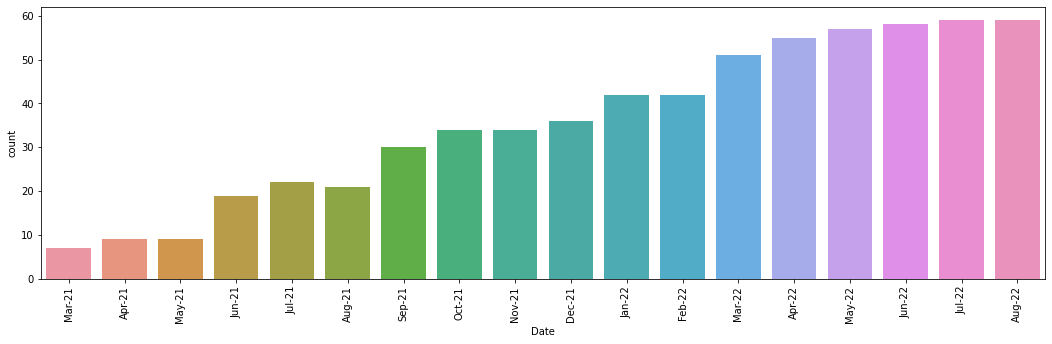

In [207]:
# Return the Series having unique values
x = Fanta['Date'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = Fanta['Date'].value_counts(sort=False)
plt.subplots(figsize=(18,5))
plt.bar(x, y)

# Labeling the axes
#plt.figure(figsize=[300,300])
plt.xlabel('Date')
plt.ylabel('count')
sb.countplot(data=Fanta, x='Date');

# Dsiplay the plot
plt.xticks(rotation=90);
plt.show()

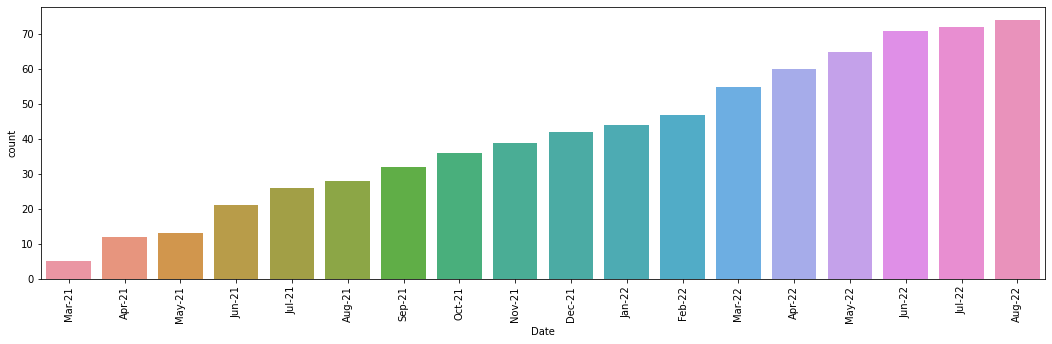

In [208]:
# Return the Series having unique values
x = Coca_Cola['Date'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = Coca_Cola['Date'].value_counts(sort=False)
plt.subplots(figsize=(18,5))
plt.bar(x, y)

# Labeling the axes
#plt.figure(figsize=[300,300])
plt.xlabel('Date')
plt.ylabel('count')
sb.countplot(data=Coca_Cola, x='Date');

# Dsiplay the plot
plt.xticks(rotation=90);
plt.show()

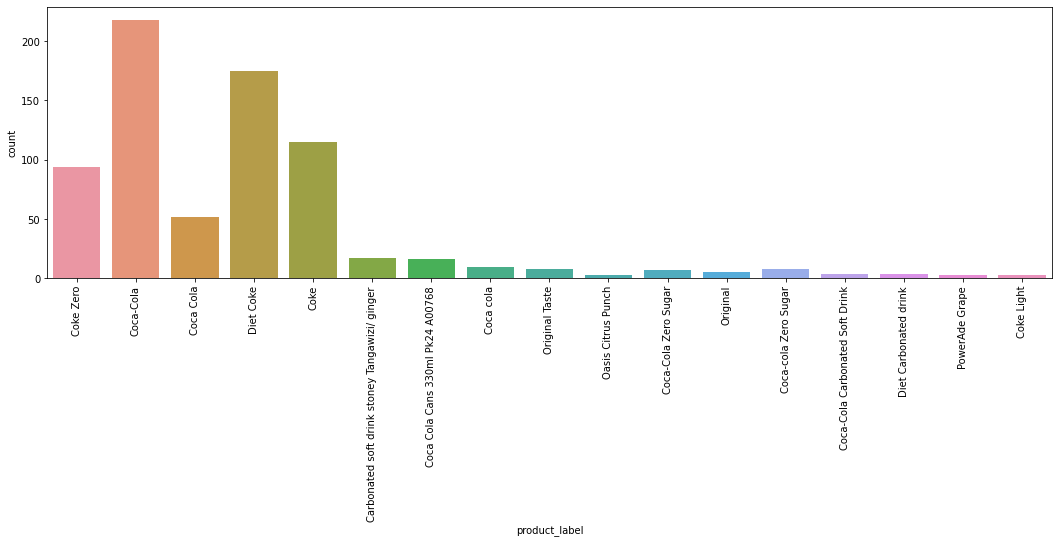

In [209]:
# Return the Series having unique values
x = Coca_Cola['product_label'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = Coca_Cola['product_label'].value_counts(sort=False)
plt.subplots(figsize=(18,5))
plt.bar(x, y)

# Labeling the axes
#plt.figure(figsize=[300,300])
plt.xlabel('product_label')
plt.ylabel('count')
sb.countplot(data=Coca_Cola, x='product_label');

# Dsiplay the plot
plt.xticks(rotation=90);
plt.show()

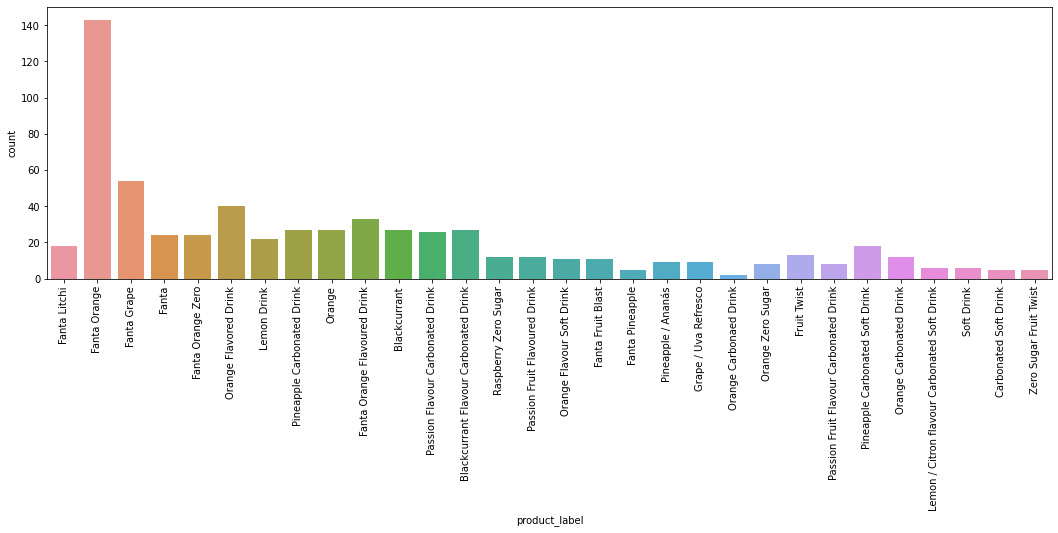

In [210]:
# Return the Series having unique values
x = Fanta['product_label'].value_counts(sort=False).index

# Return the Series having frequency count of each unique value
y = Fanta['product_label'].value_counts(sort=False)
plt.subplots(figsize=(18,5))
plt.bar(x, y)

# Labeling the axes
#plt.figure(figsize=[300,300])
plt.xlabel('product_label')
plt.ylabel('count')
sb.countplot(data=Fanta, x='product_label');

# Dsiplay the plot
plt.xticks(rotation=90);
plt.show()

Check for Seasonality

In [230]:
data2=df
data2 = data2.set_index(['Date'])
data2=pd.DataFrame(data2['bottle_count'])
data2

,bottle_count
Date,
Mar-21,1.0
Mar-21,1.0
Mar-21,1.0
Mar-21,9.0
Mar-21,6.0
...,...
Aug-22,1.0
Aug-22,1.0
Aug-22,48.0


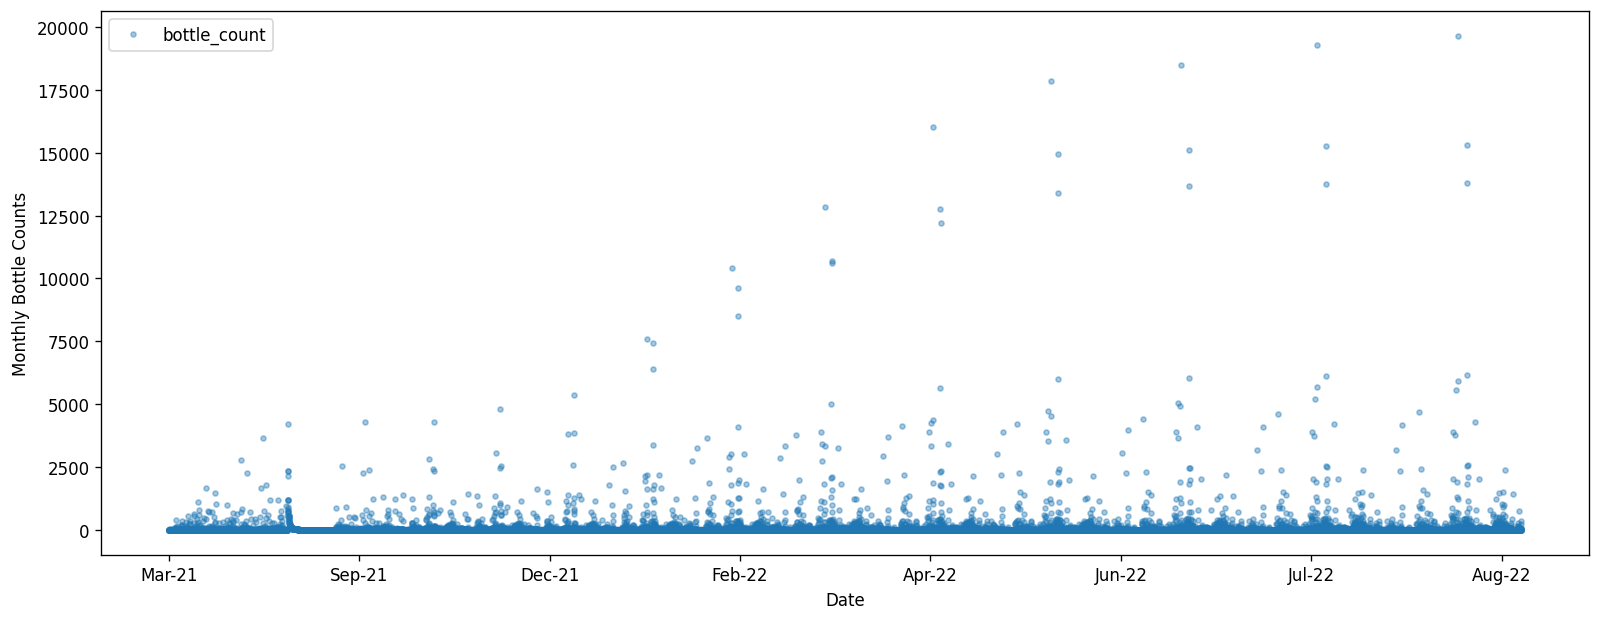

In [231]:
cols_plot = ['bottle_count']

axes      = data2[cols_plot].plot(marker='.',
                                       alpha=0.4, 
                                       linestyle='None', 
                                       figsize=(16, 6), 
                                       subplots=True)

for ax in axes:
    ax.set_ylabel('Monthly Bottle Counts')

In [211]:
# Import to the Dataset file
df.to_csv('Dataset.csv', mode='a', index=False, header=True)

# Modeling

### Import September Data

In [212]:
september = pd.read_csv('C:\\Users\\Aya Abo Bakr\\Downloads\\wastebase_scan_summary_202209F.csv')
september

,product_barcode,product_label,product_size,brand_name,manufacturer_country,manufacturer_name,scan_country,data_url,bottle_weight,bottle_count,Date
0,0.000000e+00,Purified drinking water,500ml,Rehaan ice,KE,Al Hatim Traders,KE,https://wastebase.org/#/o/f434a282-c578-461d-b...,NaN,11,Sep-22
1,8.600000e+01,Original,500ml,Coca-Cola,US,Coca-Cola,CA,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,1,Sep-22
2,1.234003e+09,Alcoholic Kombucha Drink,200 ml,Kabisa,UG,Oyoma General stores LTD,UG,https://wastebase.org/#/o/75ad3034-3ad3-4b2e-a...,NaN,1,Sep-22
3,1.660000e+10,Schweppes Gingerale,710ml,Schweppes,US,Coca-Cola,CA,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,1,Sep-22
4,1.660001e+10,Schweppes Gingerale,591 ml,Schweppes,US,Coca-Cola,CA,https://wastebase.org/#/o/c3710738-2999-4396-a...,NaN,2,Sep-22
...,...,...,...,...,...,...,...,...,...,...,...
1938,9.556140e+12,Drinking Water,1.5 L,Summer,UK,UNKNOWN_ORG,MZ,https://wastebase.org/#/o/00000000-0000-0000-0...,NaN,1,Sep-22
1939,9.556400e+12,Lemon Lime Drink,515 ml,Gatorade,US,"Pepsico, Inc",MZ,https://wastebase.org/#/o/fa6fbb15-8b61-4e1d-8...,NaN,1,Sep-22
1940,9.716190e+12,Agua Purificada,1.5 L,Nevada,MZ,"Nevada General Supplies Co, Lda",MZ,https://wastebase.org/#/o/dd241782-fd94-4a13-9...,NaN,48,Sep-22
1941,9.716190e+12,Agua Purificada,5.0 L,Nevada,MZ,"Nevada General Supplies Co, Lda",MZ,https://wastebase.org/#/o/dd241782-fd94-4a13-9...,NaN,83,Sep-22


In [213]:
# View Bottle counts of September
september = september.set_index(['Date'])
september=pd.DataFrame(september['bottle_count'])
september

,bottle_count
Date,
Sep-22,11
Sep-22,1
Sep-22,1
Sep-22,1
Sep-22,2
...,...
Sep-22,1
Sep-22,1
Sep-22,48


In [214]:
september = pd.pivot_table(september, index=['Date'],values=['bottle_count'],aggfunc='sum')
september.sort_values(by=['bottle_count'])

,bottle_count
Date,
Sep-22,207133


### Import Rest Of The Data To Predict Next Month's bottle count

In [215]:
data = pd.read_csv('D:\\UNI Materials\\Year 3\\Sem.1\\Data Analysis\\Project1\\Dataset.csv')
# View Bottle counts
data = data.set_index(['Date'])
data=pd.DataFrame(data['bottle_count'])
data

,bottle_count
Date,
Mar-21,1.0
Mar-21,1.0
Mar-21,1.0
Mar-21,9.0
Mar-21,6.0
...,...
Aug-22,1.0
Aug-22,1.0
Aug-22,48.0


### View Bottle Count Of Each Month

In [216]:
data = pd.pivot_table(data, index=['Date'],values=['bottle_count'],aggfunc='sum')
data = data.sort_values(by=['bottle_count'])
data

,bottle_count
Date,
Mar-21,438.0
Apr-21,4305.0
May-21,11237.0
Jun-21,19245.0
Jul-21,29715.0
Aug-21,33475.0
Sep-21,38841.0
Oct-21,47163.0
Nov-21,51227.0


# ARIMA: Time series analysis

## Plot time series data

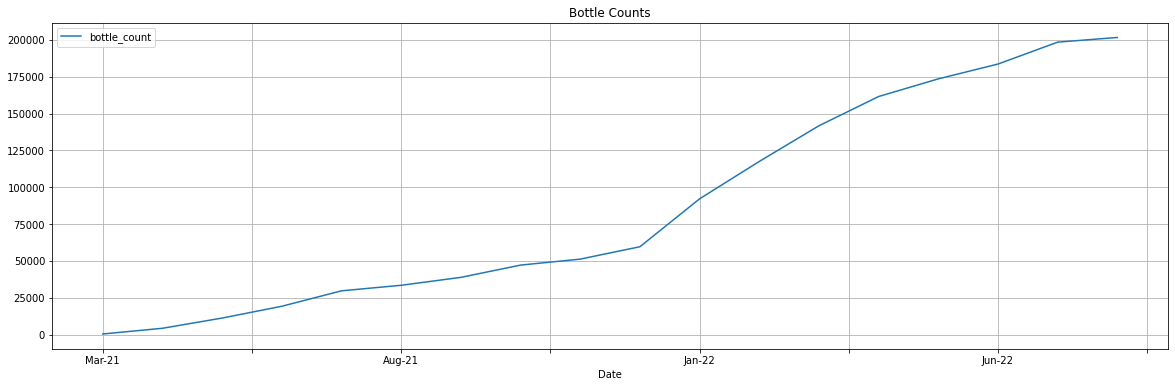

In [217]:
data.plot(figsize=(20, 6))
plt.grid()
plt.legend(loc='best')
plt.title('Bottle Counts')
plt.show(block=False)

### We could see it's non-stationary, so to apply ARIMA it will require differencing to make it stationary

                               SARIMAX Results                                
Dep. Variable:           bottle_count   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -175.758
Date:                Tue, 03 Jan 2023   AIC                            357.516
Time:                        12:22:50   BIC                            360.015
Sample:                             0   HQIC                           357.764
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8764      0.379      2.312      0.021       0.133       1.619
ma.L1         -0.0550      0.862     -0.064      0.949      -1.745       1.635
sigma2      6.804e+07   2.26e-08   3.01e+15      0.0

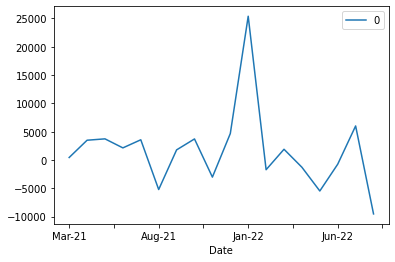

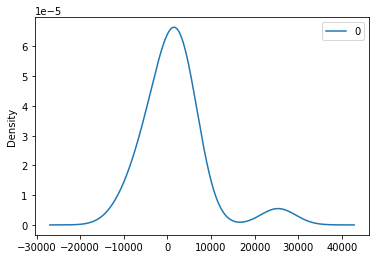

                  0
count     18.000000
mean    1657.950908
std     7194.187772
min    -9527.806014
25%    -1609.363460
50%     1838.218669
75%     3680.411977
max    25393.771590


In [218]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [219]:
data.values

array([[   438.],
       [  4305.],
       [ 11237.],
       [ 19245.],
       [ 29715.],
       [ 33475.],
       [ 38841.],
       [ 47163.],
       [ 51227.],
       [ 59624.],
       [ 92120.],
       [117485.],
       [141702.],
       [161536.],
       [173511.],
       [183565.],
       [198430.],
       [201599.]])

predicted=143323.855319, expected=141702.000000
predicted=166226.396381, expected=161536.000000
predicted=181096.105187, expected=173511.000000
predicted=184017.056797, expected=183565.000000
predicted=192413.698185, expected=198430.000000
predicted=211844.118642, expected=201599.000000
Test RMSE: 6103.643


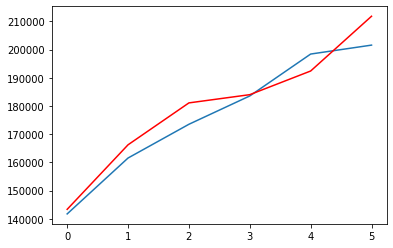

In [220]:
# evaluate an ARIMA model using a walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = data.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(1,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [221]:
september

,bottle_count
Date,
Sep-22,207133
